# Working With Stocks

In this project, I will be exploring twenty different stocks and comparing them through different metrics, such as finding the risk-to-reward ratio and seeing how heavily correlated the stocks are with each other. 

The stocks I am analyzing are:
NVDA, ULTA, SHOP, WMT, BA, TOL, UHAL, BAC, AMZN, GOOGL, AAPL, TSLA, AXP, IBM, OXY, SNAP, MRO, GM, UAL, DIS

In [1]:
# importing relevant libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

[*********************100%%**********************]  20 of 20 completed


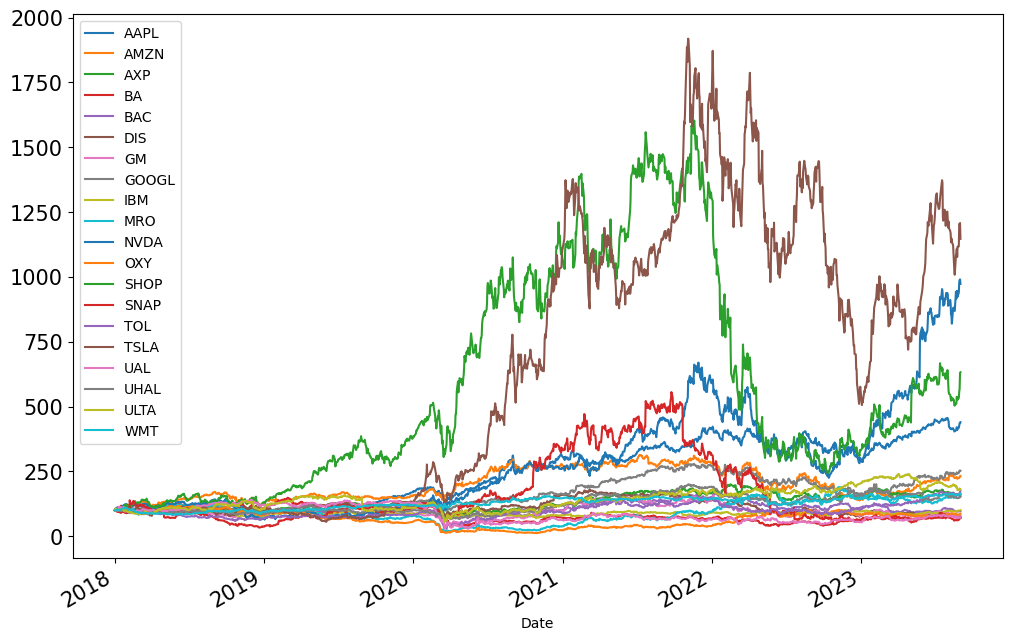

In [3]:
# Stock tickers
tickers = ['NVDA', 'ULTA', 'SHOP', 'WMT', 'BA', 'TOL', 'UHAL', 'BAC', 'AMZN', 'GOOGL',
               'AAPL', 'TSLA', 'AXP', 'IBM', 'OXY', 'SNAP','MRO', 'GM', 'UAL', 'DIS']

# reading in stock data
today = datetime.now()
stocks = yf.download(tickers, start = '2018-01-01', end = today)

# Plotting normalized data
close = stocks.Close.copy()
normalized_close = (close/close.iloc[0])*100
normalized_close.plot(figsize = (12,8), fontsize = 15)
plt.show()

In [4]:
# mean and std for daily returns
close = close.pct_change(periods= 1).dropna()
summary_stats = close.describe().T.loc[:, ['mean', 'std']].copy()
print(summary_stats)

           mean       std
AAPL   0.001246  0.020346
AMZN   0.000843  0.022455
AXP    0.000596  0.023007
BA     0.000274  0.030745
BAC    0.000215  0.021796
DIS   -0.000016  0.020234
GM     0.000180  0.025859
GOOGL  0.000847  0.019803
IBM    0.000144  0.016766
MRO    0.001009  0.036550
NVDA   0.002138  0.032918
OXY    0.000673  0.038000
SHOP   0.002095  0.040066
SNAP   0.000938  0.048823
TOL    0.000820  0.029521
TSLA   0.002539  0.040714
UAL    0.000411  0.035651
UHAL   0.000489  0.019592
ULTA   0.000777  0.026572
WMT    0.000448  0.014234


In [5]:
# Finding annualized mean and std for returns
summary_stats['mean'] = summary_stats['mean'] * 252
summary_stats['std'] = summary_stats['std'] * np.sqrt(252)
print(summary_stats)

           mean       std
AAPL   0.314098  0.322987
AMZN   0.212498  0.356458
AXP    0.150218  0.365229
BA     0.068972  0.488060
BAC    0.054122  0.345999
DIS   -0.004140  0.321209
GM     0.045293  0.410498
GOOGL  0.213369  0.314363
IBM    0.036217  0.266149
MRO    0.254233  0.580220
NVDA   0.538765  0.522559
OXY    0.169711  0.603234
SHOP   0.527828  0.636029
SNAP   0.236273  0.775042
TOL    0.206618  0.468636
TSLA   0.639705  0.646308
UAL    0.103602  0.565935
UHAL   0.123231  0.311010
ULTA   0.195824  0.421824
WMT    0.112842  0.225958


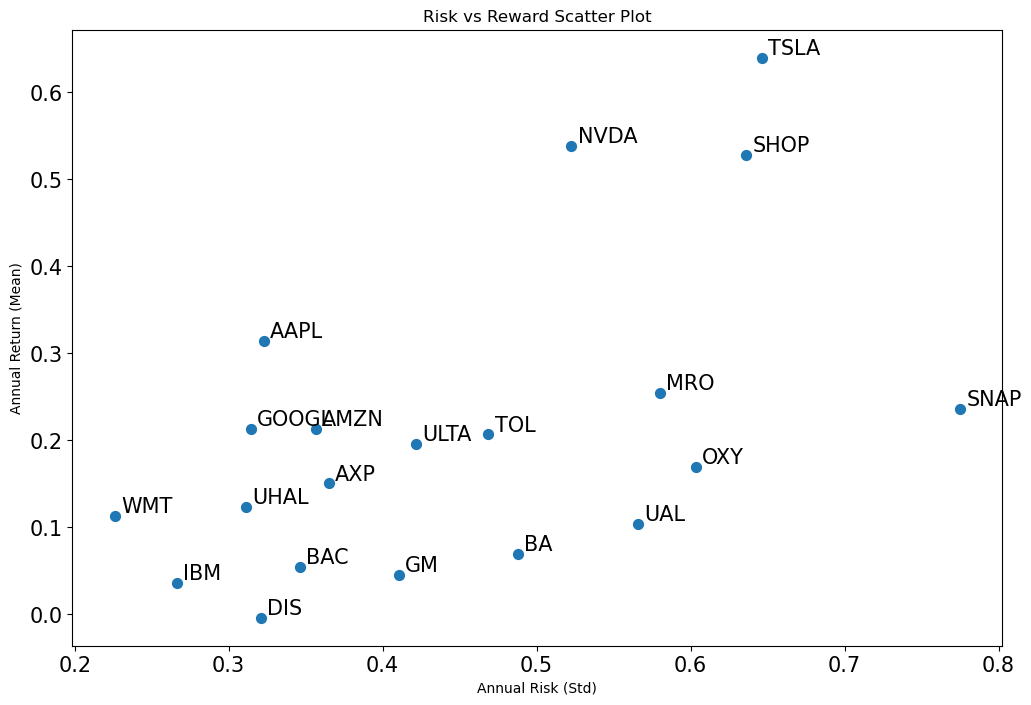

In [6]:
# Creating risk vs reward scatterplot
summary_stats.plot(kind = 'scatter', x = 'std', y = 'mean', figsize = (12,8), fontsize = 15, s = 50)
for tick in summary_stats.index:
    plt.annotate(tick, xy= (summary_stats.loc[tick,'std'] + 0.004, summary_stats.loc[tick,'mean'] + 0.004), size = 15)
plt.xlabel('Annual Risk (Std)')
plt.ylabel('Annual Return (Mean)')
plt.title('Risk vs Reward Scatter Plot')
plt.show()

This scatter plot displays the risk-to-reward ratio of all the relevant stocks. When picking stocks, you would want to look for ones with low risk and high reward. For example, between TSLA and SHOP, I would select TSLA as it carries the same amount of risk as SHOP but sees higher annual returns. Another good example would be comparing SNAP and GOOGL as they carry a similar amount of annual returns, but SNAP is a much riskier investment.

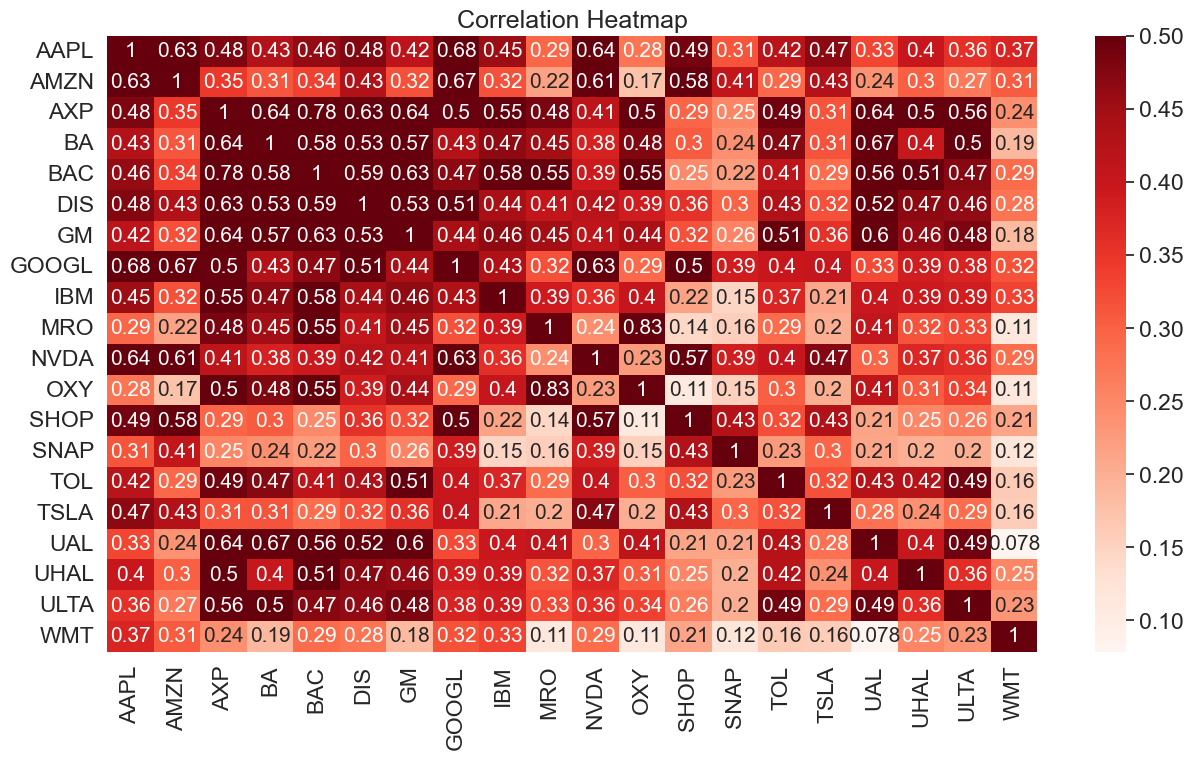

In [7]:
# Creating Correlation heatmap
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
sns.heatmap(close.corr(), cmap = 'Reds', annot = True, annot_kws= {'size':15}, vmax = 0.5)
plt.title('Correlation Heatmap')
plt.show()

The above visualization displays how heavily correlated two stocks are with each other. Companies like AAPL and GOOGL are heavily correlated as they are a part of similar sectors. If something were to happen to the tech sector, both these stock prices would be affected. This demonstrates the importance of having a diversified portfolio to minimize risk. Based off of this heatmap along with the scatterplot above, if I were to invest in five companies for my portfolio, they would be TSLA, NVDA, AXP, WMT, and AAPL. I am taking on some risk with NVDA and AAPL having a correlation coefficient of 0.64. AAPL, as a stock, individually carries relatively low risk, and I am willing to prioritize the annual returns associated with both AAPL and NVDA when constructing my portfolio.

In [8]:
# portfolio
portfolio_tickers = ['TSLA', 'NVDA', 'AXP', 'WMT', 'AAPL']
stock_portfolio = yf.download(portfolio_tickers, start = '2018-01-01', end = today)

stock_portfolio_close = stock_portfolio.Close.copy()
print(stock_portfolio_close)

[*********************100%%**********************]  5 of 5 completed
                  AAPL         AXP        NVDA        TSLA         WMT
Date                                                                  
2018-01-02   43.064999   98.940002   49.837502   21.368668   98.589996
2018-01-03   43.057499   99.550003   53.117500   21.150000   99.449997
2018-01-04   43.257500  100.849998   53.397499   20.974667   99.540001
2018-01-05   43.750000  101.080002   53.849998   21.105333  100.129997
2018-01-08   43.587502  100.150002   55.500000   22.427334  101.610001
...                ...         ...         ...         ...         ...
2023-08-28  180.190002  159.190002  468.350006  238.820007  158.720001
2023-08-29  184.119995  160.240005  487.839996  257.179993  160.050003
2023-08-30  187.649994  160.169998  492.640015  256.899994  161.199997
2023-08-31  187.869995  157.990005  493.549988  258.079987  162.610001
2023-09-01  189.460007  159.619995  485.089996  245.009995  161.570007

[1427 r

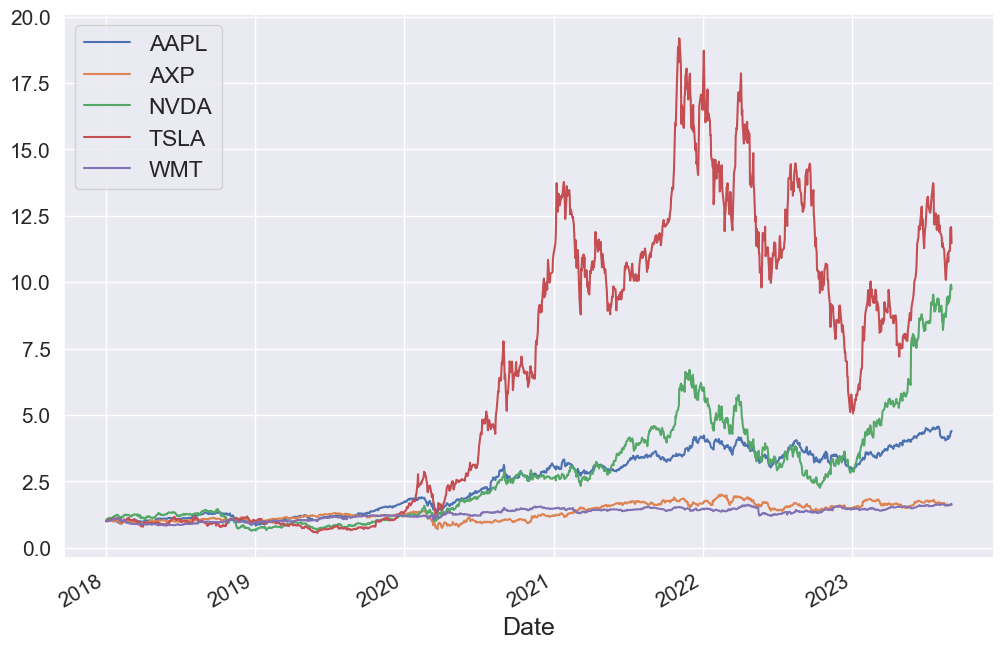

In [9]:
# normalizing portfolio closing prices
stock_portfolio_close_normal = stock_portfolio_close/stock_portfolio_close.iloc[0]
stock_portfolio_close_normal.plot(figsize = (12,8), fontsize = 15)
plt.show()

For the five stocks selected, their closing prices are graphed along with their 20 EMA and 50 EMA. I decided to look at EMA vs. SMA as SMA calculates the average evenly across price data, while EMA places a higher weight on more recent price data.  

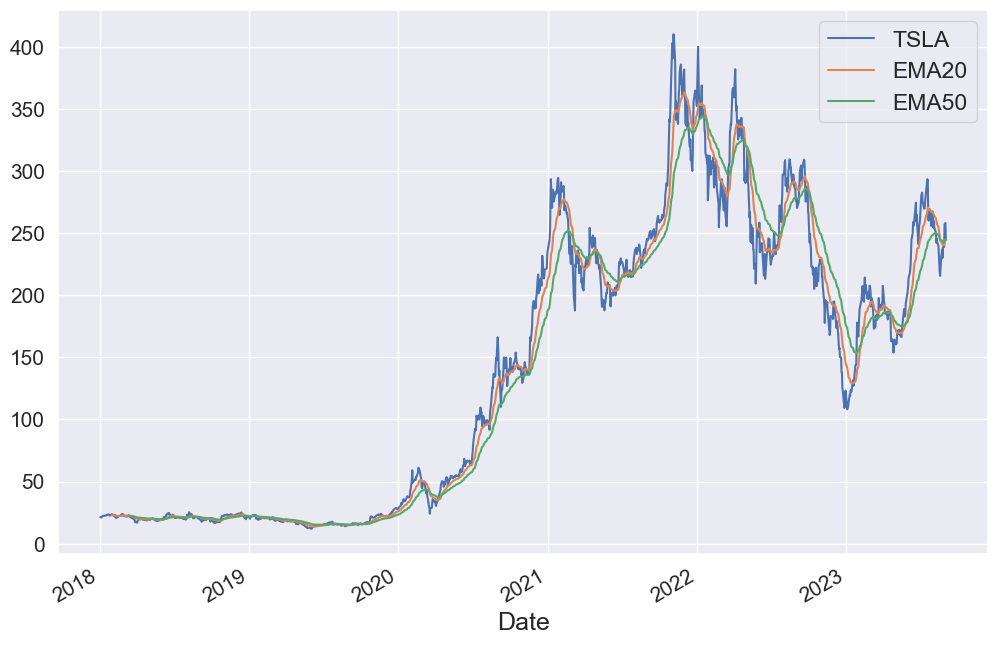

In [10]:
# TSLA ema plot
TSLA = stock_portfolio_close.TSLA.to_frame()
TSLA['EMA20'] = TSLA.ewm(span = 20, min_periods=20).mean()
TSLA['EMA50'] = TSLA['TSLA'].ewm(span = 50, min_periods =50).mean()
TSLA.plot(figsize = (12,8), fontsize = 15)
plt.show()


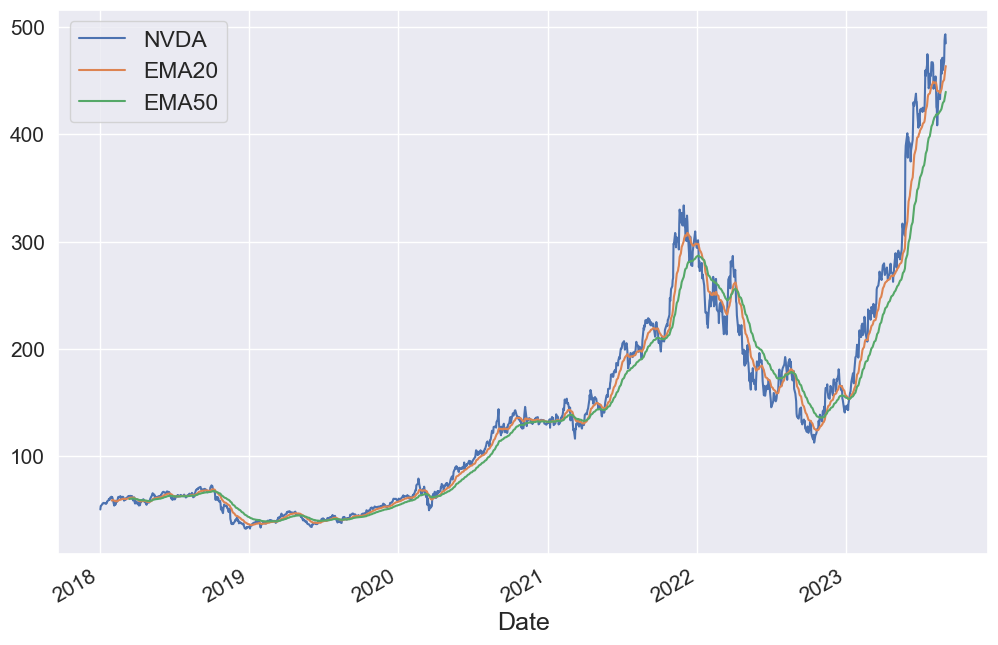

In [11]:
# NVDA ema plot
NVDA = stock_portfolio_close.NVDA.to_frame()
NVDA['EMA20'] = NVDA.ewm(span = 20, min_periods=20).mean()
NVDA['EMA50'] = NVDA['NVDA'].ewm(span = 50, min_periods=50).mean()
NVDA.plot(figsize = (12,8), fontsize = 15)
plt.show()

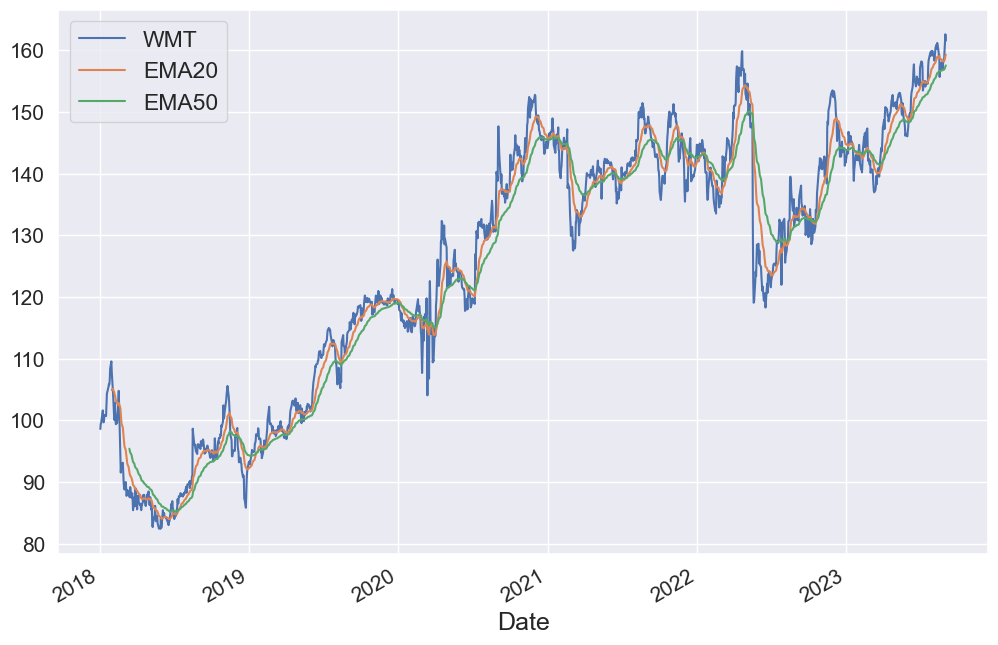

In [12]:
# WMT ema plot
WMT = stock_portfolio_close.WMT.to_frame()
WMT['EMA20'] = WMT.ewm(span = 20, min_periods = 20).mean()
WMT['EMA50'] = WMT['WMT'].ewm(span = 50, min_periods = 50).mean()
WMT.plot(figsize = (12,8), fontsize = 15)
plt.show()

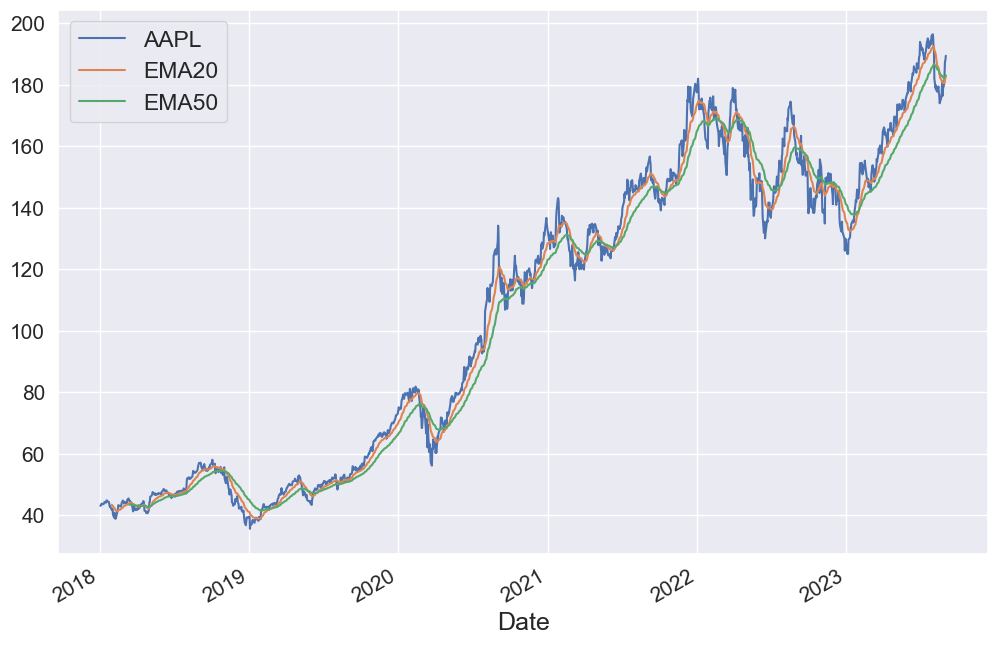

In [13]:
# AAPL ema plot
AAPL = stock_portfolio_close.AAPL.to_frame()
AAPL['EMA20'] = AAPL.ewm(span = 20, min_periods=20).mean()
AAPL['EMA50'] = AAPL['AAPL'].ewm(span = 50, min_periods=50).mean()
AAPL.plot(figsize = (12,8), fontsize = 15)
plt.show()

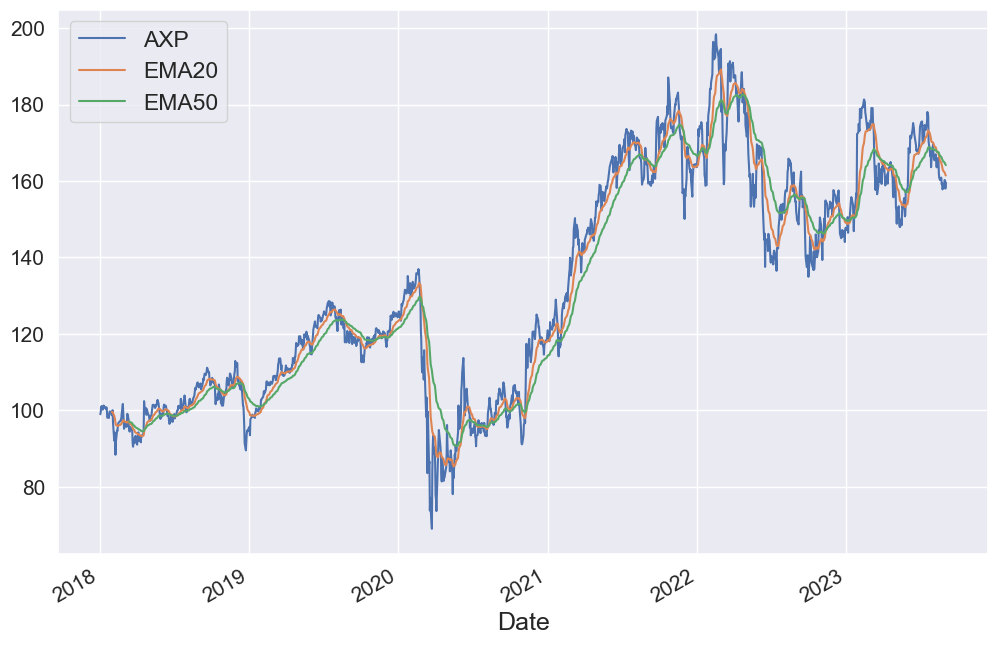

In [14]:
# AXP ema plot
AXP = stock_portfolio_close.AXP.to_frame()
AXP['EMA20'] = AXP.ewm(span = 20, min_periods=20).mean()
AXP['EMA50'] = AXP['AXP'].ewm(span = 50, min_periods=50).mean()
AXP.plot(figsize = (12,8), fontsize = 15)
plt.show()

Based on the above charts, I have noticed that when the 20 EMA crosses the 50 EMA and is above it, the stock price appears bullish, while when the 20 EMA is below the 50 EMA, the stock price appears bearish. This could be utilized as a trading strategy. 